In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [4]:
df=pd.read_csv("/content/drive/MyDrive/NLP/csv/cleaned_resume.csv")


In [5]:
df.head()

,Unnamed: 0,Category,Resume,cleaned_resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...,skills * programming languages: python (pandas...
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay 2013 to may 2017 b.e...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...","areas of interest deep learning, control syste..."
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","education details \r\n mca ymcaust, faridab..."


<Axes: xlabel='count', ylabel='Category'>

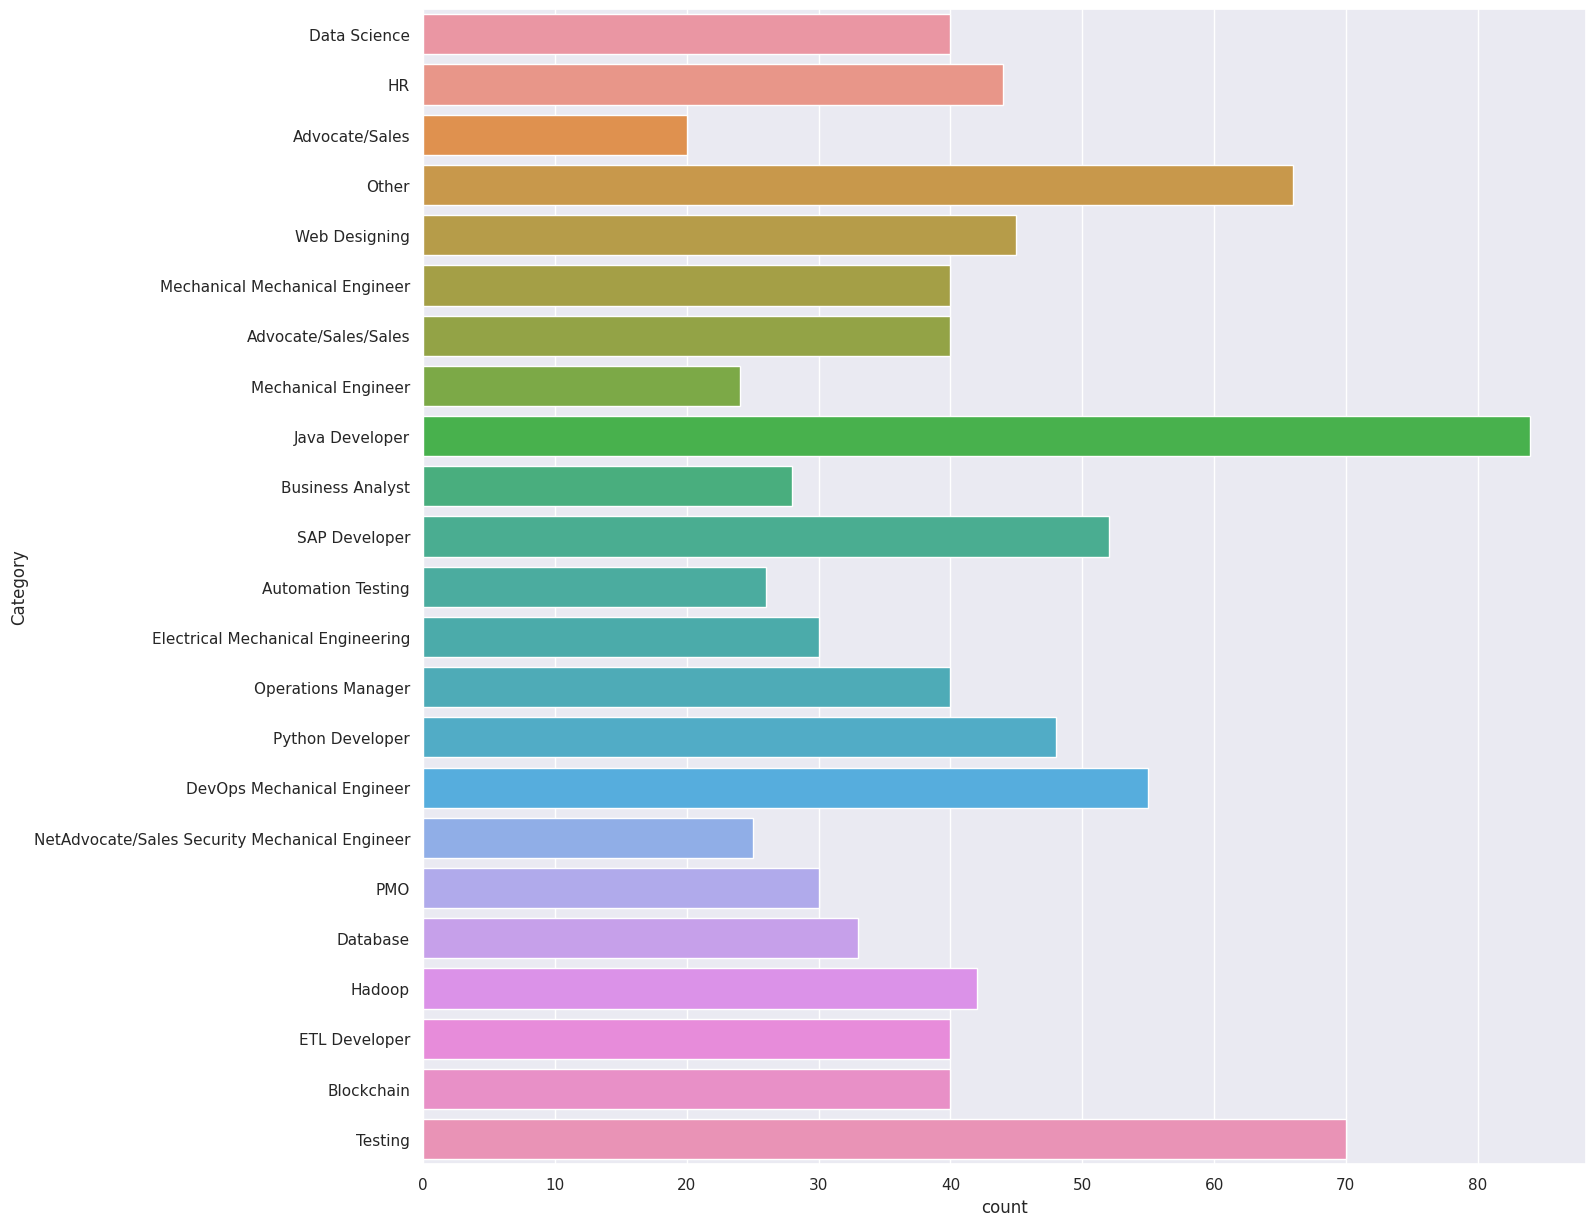

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y=df["Category"])

In [7]:
df2=df

In [8]:

# Combine all resumes into a single string
all_text = ' '.join(df['cleaned_resume'])

In [9]:
# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)


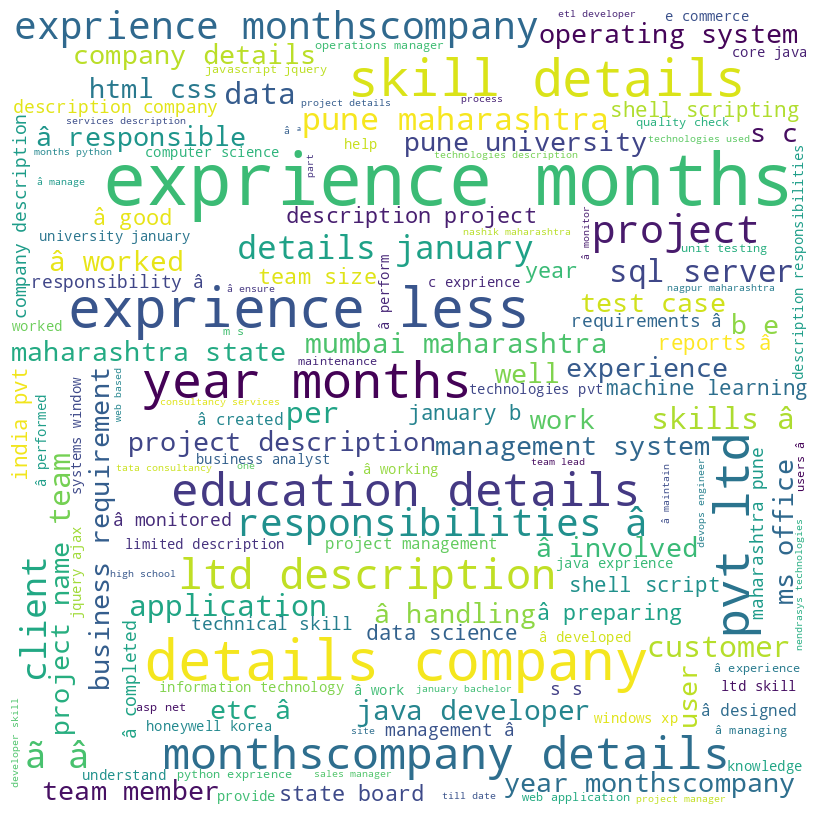

In [10]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
df['Category_no'] = df.groupby('Category').ngroup()
df.head()

,Unnamed: 0,Category,Resume,cleaned_resume,Category_no
0,0,Data Science,Skills * Programming Languages: Python (pandas...,skills * programming languages: python (pandas...,5
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay 2013 to may 2017 b.e...,5
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...","areas of interest deep learning, control syste...",5
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,5
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","education details \r\n mca ymcaust, faridab...",5


In [12]:
from sklearn.model_selection import train_test_split


In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    df.cleaned_resume,
    df.Category_no,
    test_size = 0.2,
    random_state=2023,
    stratify=df.Category_no
)

In [18]:
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle as pk

In [20]:
# Using KNN
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, epochs=5):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.epochs = epochs
        self.word2vec_model = None
        
    def fit(self, X, y=None):
        self.word2vec_model = Word2Vec(sentences=X, vector_size=self.vector_size,
                                       window=self.window, min_count=self.min_count,
                                       epochs=self.epochs)
        return self

    def transform(self, X):
        X_transformed = []
        for s in X:
            if isinstance(s, str):
                vec = [self.word2vec_model.wv[w] for w in s.split() if w in self.word2vec_model.wv]
                vec = np.mean(vec, axis=0) if vec else np.zeros(self.vector_size)
                X_transformed.append(vec)
        return np.array(X_transformed)


clf = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
pk.dump(clf ,open('/content/drive/MyDrive/NLP/pkl/word2vec_knn.pkl', 'wb'))
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.73      1.00      0.84         8
           2       0.67      0.40      0.50         5
           3       0.80      1.00      0.89         8
           4       0.71      0.83      0.77         6
           5       0.30      0.38      0.33         8
           6       0.00      0.00      0.00         7
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         8
           9       1.00      0.83      0.91         6
          10       0.60      0.33      0.43         9
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00        17
          13       1.00      0.60      0.75         5
          14       0.62      1.00      0.76         8
          15       1.00      0.40      0.57         5
          16       0.89      1.00      0.94         8
          17       0.87    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('Random Forest', RandomForestClassifier())
])

clf2.fit(X_train, y_train)
pk.dump(clf2 ,open('/content/drive/MyDrive/NLP/pkl/word2vec_RF.pkl', 'wb'))
y_pred = clf2.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         8
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         8
           9       0.62      0.83      0.71         6
          10       0.75      1.00      0.86         9
          11       1.00      0.88      0.93         8
          12       1.00      1.00      1.00        17
          13       1.00      0.60      0.75         5
          14       0.80      1.00      0.89         8
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         8
          17       1.00    

In [22]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.preprocessing import DenseTransformer

clf_gnb = Pipeline([
    ('Word2Vec', Word2VecTransformer()),
    ('to_dense', DenseTransformer()),
    ('GNB', GaussianNB())
])

clf_gnb.fit(X_train, y_train)
pk.dump(clf2 ,open('/content/drive/MyDrive/NLP/pkl/word2vec_gnb.pkl', 'wb'))
y_pred_gnb = clf_gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.27      0.38      0.32         8
           2       0.00      0.00      0.00         5
           3       0.28      0.88      0.42         8
           4       0.00      0.00      0.00         6
           5       0.20      0.12      0.15         8
           6       1.00      0.14      0.25         7
           7       1.00      0.73      0.84        11
           8       0.13      0.25      0.17         8
           9       1.00      0.17      0.29         6
          10       0.00      0.00      0.00         9
          11       0.67      0.25      0.36         8
          12       0.32      0.47      0.38        17
          13       1.00      0.40      0.57         5
          14       0.20      0.38      0.26         8
          15       0.00      0.00      0.00         5
          16       0.67      0.75      0.71         8
          17       0.30    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
pip install PyPDF2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.9 MB/s eta 0:00:00


In [23]:
import PyPDF2

In [24]:
# Testing from a new resume
from PyPDF2 import PdfReader

def extract_information(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    page = reader.pages[0]
    pdf_text = page.extract_text()
    
    return pdf_text

In [25]:
pdf_import = extract_information('/content/drive/MyDrive/NLP/csv/test/data-scientist-resume-example.pdf')

In [26]:
test_pdf = []
test_pdf.append(pdf_import)

cleaned_pdf = preprocess_text(test_pdf)

In [27]:
# Testing the model

y_pred_test = clf.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[18]
Category of predicted resume is :  Operations Manager


In [28]:
y_pred_test = clf2.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[11]
Category of predicted resume is :  Electrical Engineering


In [29]:
y_pred_test = clf_gnb.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

[12]
Category of predicted resume is :  HR


In [23]:
from sklearn.metrics.pairwise import cosine_similarity


In [24]:
job_description='At Swickard Auto Group, we’re passionate about our customers and using the most innovative, cutting-edge technology to revolutionize the way customers purchase and service their vehicles at our dealerships. Our customers are the reason we’re here. Our culture is defined by a few core principles: We want to be our customers’ favorite place to purchase, lease, or service their vehicle, and we want to be your favorite place to work! We are a hospitality company that happens to be in the automotive industry. We are data-driven, and our aim is to use data to continuously improve the in-store and online guest experience with our dealerships. Automotive News ranks Swickard Auto Group as one of the top dealer groups in the US. We are looking for like-minded team members that are laser focused on discovering insights in data to identify ways we can continue improving each interaction with our customers. Swickard’s unique perspective on automotive retail strategy is transforming the automotive industry and we are looking for top-notch individuals to join our fast-growing team. This position will support all of the data reporting requests of our growing Retail Strategy team within Swickard Auto Group. The Retail Strategy team is tasked with implementing strategic initiatives that help improve the business efficiency and customer experience across the entire organization. The daily and monthly reports that this position generates and maintains will be critical in our decision-making process. The ideal candidate will have advanced Excel skills, an analytical mindset, great attention to detail, and be comfortable dealing with high amounts of ambiguity. Duties and Responsibilities Use data mining to extract information and identify patterns or trends Blend data from multiple systems to prepare reports for upper management and dealerships Publish monthly and ad-hoc reports for management team Build reports and reconcile to system data Perform statistical analysis of data; monitor data quality Qualifications 2 years of related experience in a reporting role Bachelor’s Degree (accredited school) with emphasis in: Information Technology, Mathematics, Management Information System (MIS), Statistics, or Business Administration Strong attention to detail and a high degree of accuracy Ability to communicate well both verbally and in writing with all levels of the organization Strong analytical skills Solid understanding of data sources, data organization and storage Knowledge of statistical methodologies and data analysis techniques Must have advanced Excel skills The ideal candidate will also have experience with: Database and SQL, preferred Power BI, Tableau, or Alteryx, a plus! Swickard offers a competitive package - salary and benefits - including but not limited to medical, dental, vision, life and pet insurance, optional disability coverage, paid holidays and vacation time and a 401K plan. Come join us - be part of an amazing culture that’s transforming the way customers feel about buying or leasing their next vehicle. You’ll be working alongside other talented individuals with the same vision and commitment – together we’ll drive toward a shared goal of giving our customers an exceptional experience. And at Swickard, as an equal opportunity and affirmative action employer, we ensure everyone is welcome and provided an environment to be successful and included. We are committed to equal employment opportunity regardless of race, color, national or ethnic origin, age, religion, disability, sexual orientation, gender, gender identity and expression, marital status, and any other characteristic protected under applicable State or Federal laws and regulations. To all recruitment agencies: Swickard does not accept agency resumes. Please do not forward resumes to our careers alias or other Swickard employees. Swickard is not responsible for any fees related to unsolicited resumes. Education: Bachelors (Required) Experience: Data analytics: 2 years (Preferred) Python: 2 years (Preferred) R: 2 years (Preferred) SQL: 2 years (Preferred) Data visualization: 2 years Location: One location'


In [27]:
def clean_text(sentence_list):
  lines = [] 
  word_list = [] 
  st = PorterStemmer()
  stop_words = set(stopwords.words('english'))

  for line in sentence_list:
      #tokenize the text documents and update the lists word_list and lines
      words=[]
      for word in word_tokenize(line):
          if word.isalpha():
              words.append(word.lower())
              if word.lower() not in word_list and word.lower() not in stop_words:
                  word_list.append(word.lower())
      lines.append(' '.join(words))
  
  return lines

In [28]:
job_descriptionpp = clean_text(job_description)

In [29]:
job_description

'At Swickard Auto Group, we’re passionate about our customers and using the most innovative, cutting-edge technology to revolutionize the way customers purchase and service their vehicles at our dealerships. Our customers are the reason we’re here. Our culture is defined by a few core principles: We want to be our customers’ favorite place to purchase, lease, or service their vehicle, and we want to be your favorite place to work! We are a hospitality company that happens to be in the automotive industry. We are data-driven, and our aim is to use data to continuously improve the in-store and online guest experience with our dealerships. Automotive News ranks Swickard Auto Group as one of the top dealer groups in the US. We are looking for like-minded team members that are laser focused on discovering insights in data to identify ways we can continue improving each interaction with our customers. Swickard’s unique perspective on automotive retail strategy is transforming the automotive 

In [30]:
df_data_science = df[df['Category'] == 'Data Science']


In [31]:
similarity_scores = []


In [32]:
w2v_transformer = Word2VecTransformer()


In [33]:
w2v_model = Word2Vec(sentences=df_data_science, vector_size=100, window=5, min_count=1, epochs=5)
w2v_transformer = Word2VecTransformer()
w2v_transformer.word2vec_model = w2v_model

In [36]:
def get_similarity_scores(job_description, w2v_transformer, df_data_science):
    similarity_scores = []
    
    # preprocess job description
    job_description_pp = clean_text(job_description)
    job_desc_vector = w2v_transformer.transform([job_description_pp])[0]
    
    for selected_resume in df_data_science['resume_preprocessed']:
        # preprocess selected_resume
        selected_resume_pp = clean_text(selected_resume)
        selected_resume_vector = w2v_transformer.transform([selected_resume_pp])

        # calculate cosine similarity
        similarity_score = cosine_similarity(selected_resume_vector.reshape(1, -1), 
                                              job_desc_vector.reshape(1, -1))[0][0]

        similarity_scores.append(similarity_score)
        
    return similarity_scores


In [37]:
similarity_scores = get_similarity_scores(job_description, w2v_transformer, df_data_science)

IndexError: ignored

In [39]:
df_data_science['similarity_scores']=similarity_scores

<ipython-input-39-d3af722f9c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_science['similarity_scores']=similarity_scores


In [40]:
df_data_science

,Category,Resume,resume_cleaned,resume_preprocessed,Category_no,similarity_scores
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,skills programming languages python pandas num...,6,0.082018
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b.e uit-rgp...,education details may may data scientist data ...,6,0.000000
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,areas interest deep learning control system de...,6,0.000000
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,education details mca ymcaust faridabad haryan...,6,0.000000
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...,skills c basics iot python matlab data science...,6,0.094300
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education detail b.tech rayat bahra institute ...,education details rayat bahra institute engine...,6,0.176540
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skill â¢ ability quickly grasp techn...,personal skills ability quickly grasp technica...,6,0.000000
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425


In [41]:
top_10_resumes = df_data_science.sort_values('similarity_scores', ascending=False).head(10)


In [42]:
top_10_resumes

,Category,Resume,resume_cleaned,resume_preprocessed,Category_no,similarity_scores
33,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
23,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â¢ r â¢ python â¢ sap hana â¢ tablea...,skills r python sap hana tableau sap hana sql ...,6,0.383214
36,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
26,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
16,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â¢ python â¢ tableau â¢ data visualiz...,skills python tableau data visualization r stu...,6,0.373112
19,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425
29,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data quantitative analysis â d...,expertise data quantitative analysis decision ...,6,0.233425


In [43]:
top_10_resumes.to_csv("test.csv")

In [44]:
ls

 Bert_classification.ipynb      pkl/
 bert_similari.pynb            'Project Proposal.gdoc'
'Brainstorm notes .gdoc'       'Research Papers'/
 classfication__final_2.ipynb   test.csv
 csv/                           TF_IDF_Final.ipynb
 Demo.ipynb                     TF_IDF_similarity.ipynb
 NLLP_resume.ipynb              Untitled
 Notes/                         Word2Vec.ipynb
